In [1]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
import sys, os
sys.path.append(os.path.abspath('..'))
from shared import generate



# *Indirect Speech Act Scenario*

### **Identify and Explain Issue**

In [2]:
def identify_explain(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, your task is to evaluate which person, if any, needs to improve their communication. Take a neurodiversity-informed stance. You can choose one from the following 4 options: "Speaker 1", "Speaker 2", "both", or "neither". Explain your decision. You must output a dictionary formatted exactly as follows with no extra tags or text: { "decision":"Speaker # or both or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [3]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Can you tell me when we need to arrive?',
  'Speaker 2': 'Yes, I can tell you.'},
 {'Speaker 1': 'Did you ask whether she’s coming for dinner?',
  'Speaker 2': 'Yes, I asked.'}]

In [9]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_explain(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(8)))


In [10]:
with open('../indirect_analysis_data/identify_explain_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [11]:
with open('../indirect_analysis_data/identify_explain_ctx_neuro.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'decision': 'Speaker 2',
  'explanation': "Speaker 2 provided an answer that technically acknowledges the request but does not provide the specific information needed by Speaker 1. By saying 'Yes, I can tell you,' Speaker 2 confirms their ability to provide the information but does not actually provide the required details (the time of arrival). Effective communication should aim to provide the requested information directly or clarify if more information is needed to provide a complete answer."},
 {'decision': 'neither',
  'explanation': "Both speakers demonstrate clear and effective communication. Speaker 1 asks a straightforward question about whether an inquiry was made regarding someone's attendance at dinner. Speaker 2 responds directly and concisely, confirming that they did ask. There is no indication of miscommunication, misunderstanding, or lack of clarity from either party. Both speakers exhibit good communication skills without ambiguity or confusion, considering a variet

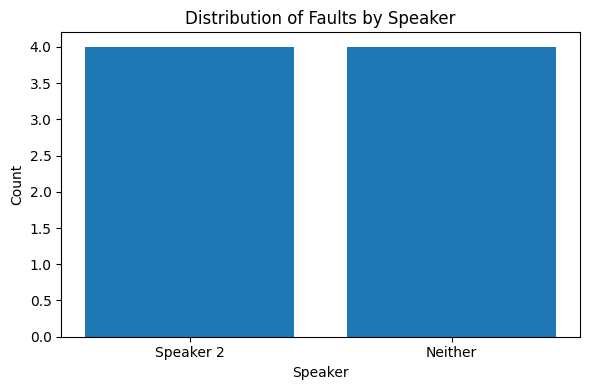

In [12]:
normalized_faults = []
for r in results_loaded:
    fault = r['decision'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    elif "both" in fault:
        normalized_faults.append("Both")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [13]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback, if at all, would you provide to one or both speakers for improving their communication? Take a neurodiversity-informed stance. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [14]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Do you know where the nearest coffee shop is?',
  'Speaker 2': 'Yes, I know where it is.'},
 {'Speaker 1': 'Is there any place we can park nearby?',
  'Speaker 2': 'Yes, there is a place to park.'}]

In [15]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [16]:
with open('../indirect_analysis_data/provide_feedback_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [17]:
with open('../indirect_analysis_data/provide_feedback_ctx_neuro.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': 'Speaker 2 could offer more helpful information by providing specific directions or the name of the coffee shop. This ensures clarity and supports individuals who may need explicit details to understand and process information effectively.'},
 {'feedback': "Speaker 2 should provide more specific information to aid comprehension, especially for neurodiverse individuals who might benefit from clear and detailed directions. For example, 'Yes, there is a place to park around the corner near the main entrance.' Speaker 1's question is clear, but for better collaboration, they could also specify any particular needs (e.g., accessible parking)."},
 {'feedback': "Speaker 2, while your response confirms your ability to provide the information, it would be more effective to directly answer Speaker 1's question with the specific start time of the meeting. This ensures clarity and efficiency in communication."},
 {'feedback': "To improve communication, consider adding details and con

### **Autistic vs Non-autistic Chances**


In [19]:
def autistic_chances(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nIn the dialogue above, what are the chances that the statement labeled "Speaker 2" could be made by an autistic person as opposed to an non-autistic person? Take a neurodiversity-informed stance. Choose exactly one option: "Low", "Medium", or "High". Explain your answer. You must output a dictionary formatted exactly as follows with no extra tags, fenced blocks or text: {"chance":"low, medium, or high", "explanation":"Explanation for your answer."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [20]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    


In [21]:
indirect_statements_generated[0:2]

[{'Speaker 1': 'Do you know where the nearest coffee shop is?',
  'Speaker 2': 'Yes, I know where it is.'},
 {'Speaker 1': 'Is there any place we can park nearby?',
  'Speaker 2': 'Yes, there is a place to park.'}]

In [22]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = autistic_chances(dialogue)['response']
    try:
        return ast.literal_eval(response)
    except:
        print(response)
        print(i, "\n\n", dialogue, "\n\n")
        return ast.literal_eval("{'chance':'error', 'explanation':'error'}")
with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [23]:
results[0:2]

[{'chance': 'medium',
  'explanation': 'While the statement made by Speaker 2 is direct and factual, it does not conclusively indicate whether the speaker is autistic or not. Autistic individuals may use clear and precise language, but so might non-autistic individuals in this context. Therefore, the chances are medium.'},
 {'chance': 'low',
  'explanation': 'The response from Speaker 2 is brief, but contextually appropriate and directly addresses the question asked by Speaker 1. While autistic individuals can use concise and direct communication, this style is not exclusive to them, and such a response could easily come from anyone, regardless of neurotype. Therefore, the likelihood that the response indicates the speaker is autistic is low.'}]

In [24]:
with open('../indirect_analysis_data/autistic_chances_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [25]:
def non_autistic_chances(dialogue):
  return generate(model = 'gpt-4o',
        system = '''Analyze the dialogue as specified below.''',
        query = dialogue + '''\n\nIn the dialogue above, what are the chances that the statement labeled "Speaker 2" could be made by a non-autistic person as opposed to an autistic person? Take a neurodiversity-informed stance. Choose exactly one option: "Low", "Medium", or "High". Explain your answer. You must output a dictionary formatted exactly as follows with no extra tags, fenced blocks or text: {"chance":"low, medium, or high", "explanation":"Explanation for your answer."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [26]:
with open('../indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    


In [27]:
indirect_statements_generated[0:2]

[{'Speaker 1': 'Do you know where the nearest coffee shop is?',
  'Speaker 2': 'Yes, I know where it is.'},
 {'Speaker 1': 'Is there any place we can park nearby?',
  'Speaker 2': 'Yes, there is a place to park.'}]

In [28]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = non_autistic_chances(dialogue)['response']
    try:
        return ast.literal_eval(response)
    except:
        print(response)
        print(i, "\n\n", dialogue, "\n\n")
        return ast.literal_eval("{'chance':'error', 'explanation':'error'}")
with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [29]:
results[0:2]

[{'chance': 'medium',
  'explanation': 'The response given by Speaker 2 is somewhat direct and lacks additional information that would be expected in a more typical conversational exchange. Non-autistic individuals might be more likely to elaborate or immediately offer further assistance, such as providing directions. However, the response is not so blunt or out of context that it would clearly indicate an autistic communication style, so the chance is medium.'},
 {'chance': 'high',
  'explanation': 'The response from Speaker 2 is direct and addresses the question asked by Speaker 1, which is a common communication style for non-autistic individuals. While autistic individuals can also give such direct answers, the likelihood is high that a non-autistic person would respond in this straightforward manner, as it is socially typical to provide clear and concise information in such contexts.'}]

In [30]:
with open('../indirect_analysis_data/non_autistic_chances_ctx_neuro.json', 'w') as f:
    json.dump(results, f, indent=2)


In [34]:
with open('../indirect_analysis_data/autistic_chances_ctx_neuro.json') as f:
    autistic_results_loaded = json.load(f)

autistic_results_loaded[0:2]


[{'chance': 'medium',
  'explanation': 'While the statement made by Speaker 2 is direct and factual, it does not conclusively indicate whether the speaker is autistic or not. Autistic individuals may use clear and precise language, but so might non-autistic individuals in this context. Therefore, the chances are medium.'},
 {'chance': 'low',
  'explanation': 'The response from Speaker 2 is brief, but contextually appropriate and directly addresses the question asked by Speaker 1. While autistic individuals can use concise and direct communication, this style is not exclusive to them, and such a response could easily come from anyone, regardless of neurotype. Therefore, the likelihood that the response indicates the speaker is autistic is low.'}]

In [35]:
with open('../indirect_analysis_data/non_autistic_chances_ctx_neuro.json') as f:
    non_autistic_results_loaded = json.load(f)

non_autistic_results_loaded[0:2]


[{'chance': 'medium',
  'explanation': 'The response given by Speaker 2 is somewhat direct and lacks additional information that would be expected in a more typical conversational exchange. Non-autistic individuals might be more likely to elaborate or immediately offer further assistance, such as providing directions. However, the response is not so blunt or out of context that it would clearly indicate an autistic communication style, so the chance is medium.'},
 {'chance': 'high',
  'explanation': 'The response from Speaker 2 is direct and addresses the question asked by Speaker 1, which is a common communication style for non-autistic individuals. While autistic individuals can also give such direct answers, the likelihood is high that a non-autistic person would respond in this straightforward manner, as it is socially typical to provide clear and concise information in such contexts.'}]

Total pairs considered: 100
Valid, aligned pairs kept: 100
Dropped pairs: 0


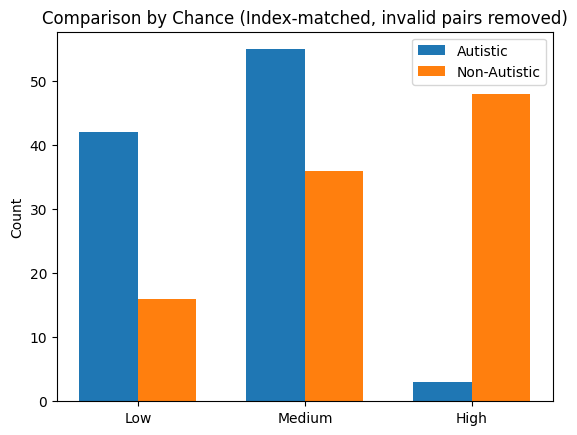

In [36]:
valid_values = {"low", "medium", "high"}

def get_chance(d):
    """Return normalized 'chance' string or None if missing/invalid."""
    v = d.get("chance", None)
    if not isinstance(v, str):
        return None
    v = v.strip().lower()
    return v if v in valid_values else None

# Index-matched filtering: keep only pairs where BOTH sides are valid
paired_valid = []
n_pairs = min(len(autistic_results_loaded), len(non_autistic_results_loaded))
for a_dict, b_dict in zip(autistic_results_loaded[:n_pairs], non_autistic_results_loaded[:n_pairs]):
    a = get_chance(a_dict)
    b = get_chance(b_dict)
    if a is not None and b is not None:
        paired_valid.append((a, b))

# Split back into two aligned lists
autistic_clean = [a for a, _ in paired_valid]
non_autistic_clean = [b for _, b in paired_valid]

print("Total pairs considered:", n_pairs)
print("Valid, aligned pairs kept:", len(paired_valid))
print("Dropped pairs:", n_pairs - len(paired_valid))

# Counts
categories = ["low", "medium", "high"]
autistic_counts = Counter(autistic_clean)
non_autistic_counts = Counter(non_autistic_clean)

autistic_values = [autistic_counts.get(cat, 0) for cat in categories]
non_autistic_values = [non_autistic_counts.get(cat, 0) for cat in categories]

# Plot (grouped bars)
x = range(len(categories))
bar_width = 0.35

plt.bar([i - bar_width/2 for i in x], autistic_values, width=bar_width, label="Autistic")
plt.bar([i + bar_width/2 for i in x], non_autistic_values, width=bar_width, label="Non-Autistic")

plt.xticks(x, [c.capitalize() for c in categories])
plt.ylabel("Count")
plt.title("Comparison by Chance (Index-matched, invalid pairs removed)")
plt.legend()
plt.show()